In [92]:
from fastbook import *

#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [1]:
import fastai
from fastai.vision.all import *

In [3]:
path = untar_data(URLs.PETS)/'images'

In [5]:
def is_cat(x):
    return x[0].isupper()

In [6]:
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42, label_func=is_cat, item_tfms=Resize(224)
)

In [88]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.157196,0.019568,0.006089,01:17


epoch,train_loss,valid_loss,error_rate,time
0,0.044314,0.017439,0.004736,01:41
1,0.041121,0.025077,0.006766,01:41
2,0.030040,0.009855,0.004060,01:45
3,0.010505,0.006964,0.004060,01:42
4,0.005779,0.005069,0.003383,01:42


In [62]:
from ipywidgets import FileUpload
from IPython.display import display
# Create a file uploader widget
file_upload = FileUpload(
    accept='.png',
    multiple=False
)
file_upload

FileUpload(value=(), accept='.jpg', description='Upload')

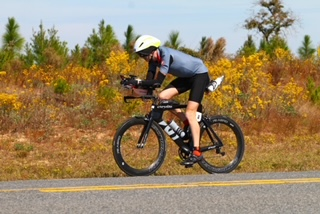

In [86]:
uploaded_file = list(file_upload.value)[0]
img = Image.open(io.BytesIO(uploaded_file['content']))
img.to_thumb(640)

In [89]:
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: False.
Probability it's a cat: 0.000042


ExecutableNotFound: failed to execute Path('dot'), make sure the Graphviz executables are on your systems' PATH